<a href="https://colab.research.google.com/github/bomnism/DA/blob/main/da14_apt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* apt_201910.csv 파일을 읽고 DataFrame 생성
    *  encoding 파라미터 설정
    *  '가격' 컬럼에는 숫자 자릿수를 구분하는 comma가 사용되고 있음(예: 10,000)
    * '가격' 컬럼은 숫자 타입이어야 함!
* 데이터 프레임 파악
    * info, head, tail, describe, dtypes, ...
* '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
    * '강원도 강릉시 견소동' -> '강원도'
* '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
    * 201910 -> 2019, 10
* 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
* 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
* 면적이 $84 m^2$ 이상 $100 m^2$ 미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
* 면적이 $84 m^2$ 이상 $100 m^2$ 미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
    * 결과를 평균의 내림차순으로 정렬해서 출력
    * 결과를 최댓값의 내림차순으로 정렬해서 출력
    * 결과를 최솟값의 오름차순으로 정렬해서 출력

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np          # 배열을 다루기 위함 

In [ ]:
apt_path = 'https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/apt_201910.csv'

In [ ]:
apt = pd.read_csv(apt_path, sep=',', encoding='cp949', thousands=',')    # engine='python' -> 두개 이상의 sep이 있을 때 
#> encoding  = 'cp949' : 한글 MS Window의 기본 인코딩 값
#> thousands=',' : 숫자의 1000자리 구분자로 쉼표가 사용됨. 

In [ ]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42758 entries, 0 to 42757
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구     42758 non-null  object 
 1   번지      42758 non-null  object 
 2   본번      42758 non-null  object 
 3   부번      42758 non-null  int64  
 4   단지명     42758 non-null  object 
 5   면적      42758 non-null  float64
 6   계약년월    42758 non-null  int64  
 7   계약일     42758 non-null  int64  
 8   가격      42758 non-null  int64  
 9   층       42758 non-null  int64  
 10  건축년도    42758 non-null  int64  
 11  도로명     42758 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.9+ MB


In [ ]:
apt.head()     # 쉼표 사라지고, 가격이 int(정수)가 되어 있음. 

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22


In [ ]:
apt.tail()

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.76,201910,29,7000,3,1994,신촌2길 28
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,5,12000,15,2002,원호암5길 32
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,15,11000,7,2002,원호암5길 32
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,17,12000,14,2002,원호암5길 32
42757,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.68,201910,26,11200,11,2002,원호암5길 32


In [ ]:
apt.describe()    # 숫자 타입 변수의 기술통계량 

,부번,면적,계약년월,계약일,가격,층,건축년도
count,42758.000000,42758.000000,42758.0,42758.000000,42758.000000,42758.000000,42758.000000
mean,4.257051,75.990614,201910.0,14.246410,31719.163946,9.614575,2002.652252
std,35.928135,24.816118,0.0,8.678427,26001.893045,6.582509,9.716009
min,0.000000,10.020000,201910.0,1.000000,600.000000,-1.000000,1962.000000
25%,0.000000,59.820000,201910.0,7.000000,15500.000000,4.000000,1995.000000
50%,0.000000,82.536900,201910.0,14.000000,25400.000000,9.000000,2003.000000
75%,1.000000,84.961200,201910.0,21.000000,40000.000000,13.000000,2011.000000
max,2269.000000,291.336000,201910.0,31.000000,485000.000000,70.000000,2019.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)


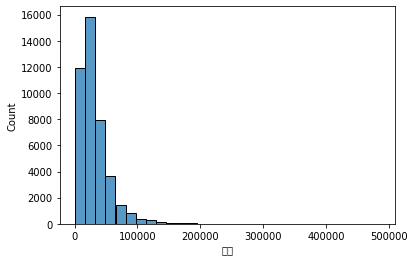

In [ ]:
#  가격의 분포 시각화 
sns.histplot(data = apt, x = '가격', bins=30)
plt.show()

#> 한글 포느가 없어서 RuntimeWarning 이 발생함 (구글 코랩에서 한글 폰트 사용하기 검색해보기 )

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)


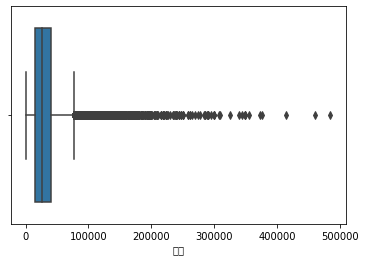

In [ ]:
sns.boxplot(data=apt, x='가격')
plt.show()

In [39]:
# # '시군구' 컬럼의 값을 이용해서, 'province' 파생 변수(도, 광역시 이름) 만듦.
# '강원도 강릉시 견소동' -> '강원도'
# apt['province'] = apt.시군구.str[-12:-7].unique() -> 같은것처럼 보이지만 같은 결과가 아니다. 
apt['province'] = apt['시군구'].str.split().str[0]
# apt['시군구'].str.split()       -> 리스트들을 가지고 있는  Series
apt['county'] = apt['시군구'].str.split().str[1]

In [40]:
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시


In [41]:
apt.province.unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [42]:
apt.county.unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양덕양구', '고양일산동구', '고양일산서구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시', '성남분당구', '성남수정구', '성남중원구',
       '수원권선구', '수원영통구', '수원장안구', '수원팔달구', '시흥시', '안산단원구', '안산상록구', '안성시',
       '안양동안구', '안양만안구', '양주시', '양평군', '여주시', '연천군', '오산시', '용인기흥구',
       '용인수지구', '용인처인구', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시', '거제시', '거창군', '김해시', '남해군', '밀양시', '사천시', '산청군', '양산시',
       '의령군', '진주시', '창녕군', '창원마산합포구', '창원마산회원구', '창원성산구', '창원의창구',
       '창원진해구', '통영시', '하동군', '함안군', '함양군', '합천군', '경산시', '경주시', '고령군',
       '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시', '성주군', '안동시', '영덕군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군',
       '포항남구', '포항북구', '광산구', '남구', '동구', '북구', '서구', '달서구', '달성군', '수성구',
       '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구', '사상구',
    

In [43]:
# '계약년월' 컬럼의 값을 이용해서, 'year(계약년도)', 'month(계약월)' 파생 변수 만듦.
# 201910 -> 2019, 10
apt['contr_year'] = apt['계약년월'] // 100
apt['countr_month'] = apt['계약년월'] % 100

#  에러 코드 (Can only use .str accessor with string values!)

In [44]:
apt

,시군구,번지,본번,부번,단지명,면적,계약년월,계약일,가격,층,건축년도,도로명,province,county,contr_year,countr_month
0,강원도 강릉시 견소동,202,202,0,송정한신,59.800,201910,4,10900,5,1997,경강로2539번길 8,강원도,강릉시,2019,10
1,강원도 강릉시 견소동,202,202,0,송정한신,116.175,201910,31,18500,10,1997,경강로2539번길 8,강원도,강릉시,2019,10
2,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,5,25000,6,2005,경강로2539번길 22,강원도,강릉시,2019,10
3,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,12,20600,3,2005,경강로2539번길 22,강원도,강릉시,2019,10
4,강원도 강릉시 견소동,289,289,0,송정해변신도브래뉴아파트,84.990,201910,20,20500,1,2005,경강로2539번길 22,강원도,강릉시,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42753,충청북도 충주시 호암동,547-6,547,6,호반현대,59.760,201910,29,7000,3,1994,신촌2길 28,충청북도,충주시,2019,10
42754,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,5,12000,15,2002,원호암5길 32,충청북도,충주시,2019,10
42755,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,15,11000,7,2002,원호암5길 32,충청북도,충주시,2019,10
42756,충청북도 충주시 호암동,221-23,221,23,호암리버빌(1단지),84.680,201910,17,12000,14,2002,원호암5길 32,충청북도,충주시,2019,10


파생 변수 추가

In [ ]:
# 서울특별시 아파트들의 동별 아파트 가격의 개수, 평균, 최솟값, 최댓값
# 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값
apt.시군구.unique()

array(['강원도 강릉시 견소동', '강원도 강릉시 교동', '강원도 강릉시 남문동', ..., '충청북도 충주시 지현동',
       '충청북도 충주시 칠금동', '충청북도 충주시 호암동'], dtype=object)

In [ ]:
# 면적이  84m2  이상  100m2  미만의 서울특별시 아파트들 중에서, 동별 아파트 가격 개수, 평균, 최솟값, 최댓값
# 면적이  84m2  이상  100m2  미만의 아파트들 중에서, 도/광역시별 아파트 가격 개수, 평균, 최솟값, 최댓값